In [ ]:
import torch
import torch.nn as nn
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from utils.models import siamese_model
import cv2
from skimage.color import label2rgb

device = "cuda" if torch.cuda.is_available() else "cpu"
route="Models/Contrastive_Models/Contrastive_b0_128_182_5_SupConLoss.pth"
EMBEDDING_SIZE=128

checkpoint=torch.load(route)
model=siamese_model(checkpoint["model_type"],device,EMBEDDING_SIZE)
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)
model.eval()

def get_image(route):
    size=256
    image1 = cv2.imread(route)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        
    #scale images to [0,1]
    image1=image1/255.0

    #Rescale resolution to self.size,self.size
    image1 = cv2.resize(image1, (size, size))


    #Permute dimensions (Channels, Width, Height)


    #Data to tensor
    
    return image1

# Function to calculate cosine similarity between embeddings
def cosine_similarity(emb1, emb2):
    emb1 = emb1 / np.linalg.norm(emb1, axis=1, keepdims=True)
    emb2 = emb2 / np.linalg.norm(emb2, axis=1, keepdims=True)
    return np.dot(emb1, emb2.T)

# LIME explainer function
def explain_image(image,model, num_samples=10000):
    explainer = lime_image.LimeImageExplainer()
    def model_predict(images):
        embeddings = model.predict_one_image(torch.from_numpy(np.array(images)).to(torch.float32).permute(0,3,1,2).to(device))
        embeddings=embeddings.cpu().numpy()
        # Compare embeddings to a reference embedding if needed
        # For example purposes, we return dummy similarity scores
        reference_embedding = model.predict_one_image(torch.from_numpy(np.array(image)).to(torch.float32).permute(2,0,1).unsqueeze(0).to(device))
        reference_embedding=reference_embedding.cpu().numpy()
        similarities = cosine_similarity(embeddings, reference_embedding)
        
        return similarities
    
    explanation = explainer.explain_instance(
        image,
        model_predict,
        top_labels=1,
        hide_color=0,
        num_samples=num_samples
    )
    
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )
    return temp, mask
    




Loaded pretrained weights for efficientnet-b0


In [ ]:
# Plot original image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)  # Original image (RGB)
    # Overlay mask: Red where mask is True
    plt.imshow(mask, cmap='Reds', alpha=0.25)  # Adjust alpha for transparency
    
    plt.title("Image with LIME Explanation Overlay")
    plt.axis("off")
    plt.show()
    # Load your image here



100%|██████████| 10000/10000 [03:30<00:00, 47.48it/s]


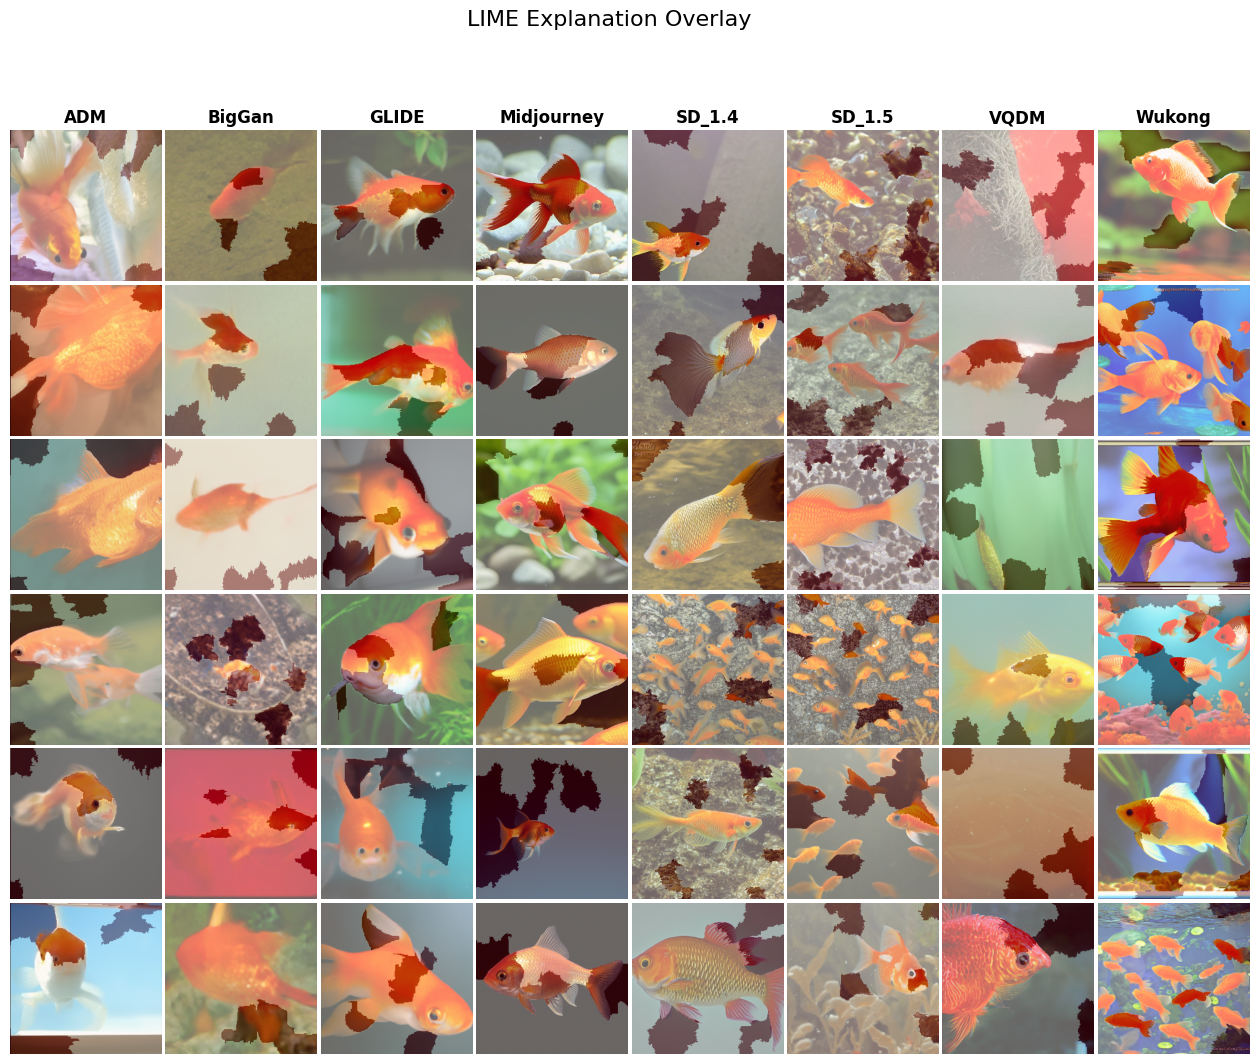

In [21]:
import matplotlib.gridspec as gridspec
routes=[
    ["Datasets/GenImage/ADM/val/ai/1_adm_7.PNG",
    "Datasets/GenImage/ADM/val/ai/1_adm_174.PNG",
    "Datasets/GenImage/ADM/val/ai/1_adm_153.PNG",
    "Datasets/GenImage/ADM/val/ai/1_adm_91.PNG",
    "Datasets/GenImage/ADM/val/ai/1_adm_85.PNG",
    "Datasets/GenImage/ADM/val/ai/1_adm_34.PNG"],
    ["Datasets/GenImage/BigGan/val/ai/001_biggan_00143.png",
    "Datasets/GenImage/BigGan/val/ai/001_biggan_00127.png",
    "Datasets/GenImage/BigGan/val/ai/001_biggan_00074.png",
    "Datasets/GenImage/BigGan/val/ai/001_biggan_00039.png",
    "Datasets/GenImage/BigGan/val/ai/001_biggan_00035.png",
    "Datasets/GenImage/BigGan/val/ai/001_biggan_00020.png"],
    ["Datasets/GenImage/GLIDE/val/ai/GLIDE_1000_200_00_001_glide_00143.png",
    "Datasets/GenImage/GLIDE/val/ai/GLIDE_1000_200_00_001_glide_00127.png",
    "Datasets/GenImage/GLIDE/val/ai/GLIDE_1000_200_00_001_glide_00074.png",
    "Datasets/GenImage/GLIDE/val/ai/GLIDE_1000_200_00_001_glide_00039.png",
    "Datasets/GenImage/GLIDE/val/ai/GLIDE_1000_200_00_001_glide_00035.png",
    "Datasets/GenImage/GLIDE/val/ai/GLIDE_1000_200_00_001_glide_00020.png"],
    ["Datasets/GenImage/Midjourney/val/ai/1_midjourney_198.png", 
    "Datasets/GenImage/Midjourney/val/ai/1_midjourney_197.png", 
    "Datasets/GenImage/Midjourney/val/ai/1_midjourney_169.png", 
    "Datasets/GenImage/Midjourney/val/ai/1_midjourney_100.png", 
    "Datasets/GenImage/Midjourney/val/ai/1_midjourney_88.png", 
    "Datasets/GenImage/Midjourney/val/ai/1_midjourney_34.png"],
    ["Datasets/GenImage/stable_diffusion_v_1_4/val/ai/001_sdv4_00143.png",
    "Datasets/GenImage/stable_diffusion_v_1_4/val/ai/001_sdv4_00127.png",
    "Datasets/GenImage/stable_diffusion_v_1_4/val/ai/001_sdv4_00074.png",
    "Datasets/GenImage/stable_diffusion_v_1_4/val/ai/001_sdv4_00039.png",
    "Datasets/GenImage/stable_diffusion_v_1_4/val/ai/001_sdv4_00035.png",
    "Datasets/GenImage/stable_diffusion_v_1_4/val/ai/001_sdv4_00020.png"],
    ["Datasets/GenImage/stable_diffusion_v_1_5/val/ai/001_sdv5_00009.png",
    "Datasets/GenImage/stable_diffusion_v_1_5/val/ai/001_sdv5_00020.png",
    "Datasets/GenImage/stable_diffusion_v_1_5/val/ai/001_sdv5_00027.png",
    "Datasets/GenImage/stable_diffusion_v_1_5/val/ai/001_sdv5_00039.png",
    "Datasets/GenImage/stable_diffusion_v_1_5/val/ai/001_sdv5_00100.png",
    "Datasets/GenImage/stable_diffusion_v_1_5/val/ai/001_sdv5_00195.png"],
    ["Datasets/GenImage/VQDM/val/ai/VQDM_1000_200_00_001_vqdm_00020.png",
    "Datasets/GenImage/VQDM/val/ai/VQDM_1000_200_00_001_vqdm_00035.png",
    "Datasets/GenImage/VQDM/val/ai/VQDM_1000_200_00_001_vqdm_00039.png",
    "Datasets/GenImage/VQDM/val/ai/VQDM_1000_200_00_001_vqdm_00074.png",
    "Datasets/GenImage/VQDM/val/ai/VQDM_1000_200_00_001_vqdm_00127.png",
    "Datasets/GenImage/VQDM/val/ai/VQDM_1000_200_00_001_vqdm_00143.png"],
    ["Datasets/GenImage/wukong/val/ai/1_wukong_image198.png",
    "Datasets/GenImage/wukong/val/ai/1_wukong_image188.png",
    "Datasets/GenImage/wukong/val/ai/1_wukong_image128.png",
    "Datasets/GenImage/wukong/val/ai/1_wukong_image88.png",
    "Datasets/GenImage/wukong/val/ai/1_wukong_image86.png",
    "Datasets/GenImage/wukong/val/ai/1_wukong_image61.png"],   
]
routes=np.array(routes)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch

routes = np.array(routes)
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(6, 8, wspace=0.02, hspace=0.02)  # No space between subplots

# Column titles
column_titles = ["ADM", "BigGan", "GLIDE", "Midjourney", "SD_1.4", "SD_1.5", "VQDM", "Wukong"]

# Plot the images
for row in range(6):
    for col in range(8):
        ax = fig.add_subplot(gs[row, col])  # Add subplot at specified grid position
        
        route_image = routes[col, row]
        image = get_image(route_image)  # Get the image

        with torch.no_grad():
            # Explain the image
            image_explained, mask = explain_image(image, model)

        ax.imshow(image_explained)
        ax.imshow(mask, cmap='Reds', alpha=0.4)
        ax.axis("off")  # Turn off axis

        # Set column titles only for the first row
        if row == 0:
            ax.set_title(column_titles[col], fontsize=12, weight='bold', pad=5)

# Set the overall title
plt.suptitle("LIME Explanation Overlay", fontsize=16, y=0.98)

plt.show()